In [1]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

#import iris
#import iris.iterate
#import iris.coords
#import iris.plot as iplt
import gsw


In [2]:
# load ROMS avg output
for mm  in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    ds = xr.open_dataset('/scratch/project_2000339/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/ocean_avg_00' + mm + '.nc')
    print(ds.variables["temp"].shape)
    temp_tmp = np.nanmean(ds.variables["temp"], axis=0)
    salt_tmp = np.nanmean(ds.variables["salt"], axis=0)
    shflux_tmp = np.nanmean(ds.variables["shflux"], axis=0)
    ssflux_tmp = np.nanmean(ds.variables["ssflux"], axis=0)
    m_tmp = np.nanmean(ds.variables["m"], axis=0)

    ds = ds.set_coords(['Cs_r', 'Cs_w', 'hc', 'h', 'Vtransform'])
    if ds.Vtransform == 1:
        Zo_rho = ds.hc * (ds.s_rho - ds.Cs_r) + ds.Cs_r * ds.h
        z_rho_tmp = Zo_rho + ds.zeta * (1 + Zo_rho/ds.h)
        print("Vtransform=1")
    elif ds.Vtransform == 2:
        Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
        z_rho_tmp = ds.zeta + (ds.zeta + ds.h) * Zo_rho + ds.zice
        print("Vtransform=2")
        Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
        z_w_tmp = ds.zeta + (ds.zeta + ds.h) * Zo_w + ds.zice

    z_rho_avg = np.nanmean(z_rho_tmp, axis=0)
    z_w_avg = np.nanmean(z_w_tmp,axis=0)

    # concatanate monthly avgs into a yearly variable
    if mm == '01':
        temp = temp_tmp
        salt = salt_tmp
        shflux = shflux_tmp
        ssflux = ssflux_tmp
        m = m_tmp
        z_rho = z_rho_avg
        z_w = z_w_avg
    elif mm == '02':
        temp = np.stack((temp,temp_tmp), axis=0)
        salt = np.stack((salt,salt_tmp), axis=0)
        shflux = np.stack((shflux,shflux_tmp), axis=0)
        ssflux = np.stack((ssflux,ssflux_tmp), axis=0)
        m = np.stack((m,m_tmp), axis=0)
        z_rho = np.stack((z_rho,z_rho_avg), axis=0)
        z_w = np.stack((z_w,z_w_avg), axis=0)
    else:
        temp_tmp_4thdim = np.expand_dims(temp_tmp, axis=0)
        temp = np.concatenate((temp,temp_tmp_4thdim), axis=0)
        salt_tmp_4thdim = np.expand_dims(salt_tmp, axis=0)
        salt = np.concatenate((salt,salt_tmp_4thdim), axis=0)
        shflux_tmp_4thdim = np.expand_dims(shflux_tmp, axis=0)
        shflux = np.concatenate((shflux,shflux_tmp_4thdim), axis=0)
        ssflux_tmp_4thdim = np.expand_dims(ssflux_tmp, axis=0)
        ssflux = np.concatenate((ssflux,ssflux_tmp_4thdim), axis=0)
        m_tmp_4thdim = np.expand_dims(m_tmp, axis=0)
        m = np.concatenate((m,m_tmp_4thdim), axis=0)
        z_rho_tmp_4thdim = np.expand_dims(z_rho_avg, axis=0)
        z_rho = np.concatenate((z_rho,z_rho_tmp_4thdim), axis=0)
        z_w_tmp_4thdim = np.expand_dims(z_w_avg, axis=0)
        z_w = np.concatenate((z_w,z_w_tmp_4thdim), axis=0)
#ds.coords['flux'] = flux#.transpose() # put flux into ds dataset

    ds.close()

sigma_t_sfc = gsw.rho(salt[:,-1,:,:],temp[:,-1,:,:],0) - 1000

(7, 31, 560, 630)


/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:5: RuntimeWarning: Mean of empty slice
  temp_tmp = np.nanmean(ds.variables["temp"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:6: RuntimeWarning: Mean of empty slice
  salt_tmp = np.nanmean(ds.variables["salt"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:7: RuntimeWarning: Mean of empty slice
  shflux_tmp = np.nanmean(ds.variables["shflux"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:8: RuntimeWarning: Mean of empty slice
  ssflux_tmp = np.nanmean(ds.variables["ssflux"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:9: RuntimeWarning: Mean of empty slice
  m_tmp = np.nanmean(ds.variables["m"], axis=0)


Vtransform=2


/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:23: RuntimeWarning: Mean of empty slice
  z_rho_avg = np.nanmean(z_rho_tmp, axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:24: RuntimeWarning: Mean of empty slice
  z_w_avg = np.nanmean(z_w_tmp,axis=0)


(6, 31, 560, 630)


/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:5: RuntimeWarning: Mean of empty slice
  temp_tmp = np.nanmean(ds.variables["temp"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:6: RuntimeWarning: Mean of empty slice
  salt_tmp = np.nanmean(ds.variables["salt"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:7: RuntimeWarning: Mean of empty slice
  shflux_tmp = np.nanmean(ds.variables["shflux"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:8: RuntimeWarning: Mean of empty slice
  ssflux_tmp = np.nanmean(ds.variables["ssflux"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:9: RuntimeWarning: Mean of empty slice
  m_tmp = np.nanmean(ds.variables["m"], axis=0)


Vtransform=2


/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:23: RuntimeWarning: Mean of empty slice
  z_rho_avg = np.nanmean(z_rho_tmp, axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:24: RuntimeWarning: Mean of empty slice
  z_w_avg = np.nanmean(z_w_tmp,axis=0)


(6, 31, 560, 630)


/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:5: RuntimeWarning: Mean of empty slice
  temp_tmp = np.nanmean(ds.variables["temp"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:6: RuntimeWarning: Mean of empty slice
  salt_tmp = np.nanmean(ds.variables["salt"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:7: RuntimeWarning: Mean of empty slice
  shflux_tmp = np.nanmean(ds.variables["shflux"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:8: RuntimeWarning: Mean of empty slice
  ssflux_tmp = np.nanmean(ds.variables["ssflux"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:9: RuntimeWarning: Mean of empty slice
  m_tmp = np.nanmean(ds.variables["m"], axis=0)


Vtransform=2


/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:23: RuntimeWarning: Mean of empty slice
  z_rho_avg = np.nanmean(z_rho_tmp, axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:24: RuntimeWarning: Mean of empty slice
  z_w_avg = np.nanmean(z_w_tmp,axis=0)


(6, 31, 560, 630)


/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:5: RuntimeWarning: Mean of empty slice
  temp_tmp = np.nanmean(ds.variables["temp"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:6: RuntimeWarning: Mean of empty slice
  salt_tmp = np.nanmean(ds.variables["salt"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:7: RuntimeWarning: Mean of empty slice
  shflux_tmp = np.nanmean(ds.variables["shflux"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:8: RuntimeWarning: Mean of empty slice
  ssflux_tmp = np.nanmean(ds.variables["ssflux"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:9: RuntimeWarning: Mean of empty slice
  m_tmp = np.nanmean(ds.variables["m"], axis=0)


Vtransform=2


/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:23: RuntimeWarning: Mean of empty slice
  z_rho_avg = np.nanmean(z_rho_tmp, axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:24: RuntimeWarning: Mean of empty slice
  z_w_avg = np.nanmean(z_w_tmp,axis=0)


(6, 31, 560, 630)


/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:5: RuntimeWarning: Mean of empty slice
  temp_tmp = np.nanmean(ds.variables["temp"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:6: RuntimeWarning: Mean of empty slice
  salt_tmp = np.nanmean(ds.variables["salt"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:7: RuntimeWarning: Mean of empty slice
  shflux_tmp = np.nanmean(ds.variables["shflux"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:8: RuntimeWarning: Mean of empty slice
  ssflux_tmp = np.nanmean(ds.variables["ssflux"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:9: RuntimeWarning: Mean of empty slice
  m_tmp = np.nanmean(ds.variables["m"], axis=0)


Vtransform=2


/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:23: RuntimeWarning: Mean of empty slice
  z_rho_avg = np.nanmean(z_rho_tmp, axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:24: RuntimeWarning: Mean of empty slice
  z_w_avg = np.nanmean(z_w_tmp,axis=0)


(6, 31, 560, 630)


/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:5: RuntimeWarning: Mean of empty slice
  temp_tmp = np.nanmean(ds.variables["temp"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:6: RuntimeWarning: Mean of empty slice
  salt_tmp = np.nanmean(ds.variables["salt"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:7: RuntimeWarning: Mean of empty slice
  shflux_tmp = np.nanmean(ds.variables["shflux"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:8: RuntimeWarning: Mean of empty slice
  ssflux_tmp = np.nanmean(ds.variables["ssflux"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:9: RuntimeWarning: Mean of empty slice
  m_tmp = np.nanmean(ds.variables["m"], axis=0)


Vtransform=2


/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:23: RuntimeWarning: Mean of empty slice
  z_rho_avg = np.nanmean(z_rho_tmp, axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:24: RuntimeWarning: Mean of empty slice
  z_w_avg = np.nanmean(z_w_tmp,axis=0)


(6, 31, 560, 630)


/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:5: RuntimeWarning: Mean of empty slice
  temp_tmp = np.nanmean(ds.variables["temp"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:6: RuntimeWarning: Mean of empty slice
  salt_tmp = np.nanmean(ds.variables["salt"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:7: RuntimeWarning: Mean of empty slice
  shflux_tmp = np.nanmean(ds.variables["shflux"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:8: RuntimeWarning: Mean of empty slice
  ssflux_tmp = np.nanmean(ds.variables["ssflux"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:9: RuntimeWarning: Mean of empty slice
  m_tmp = np.nanmean(ds.variables["m"], axis=0)


Vtransform=2


/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:23: RuntimeWarning: Mean of empty slice
  z_rho_avg = np.nanmean(z_rho_tmp, axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:24: RuntimeWarning: Mean of empty slice
  z_w_avg = np.nanmean(z_w_tmp,axis=0)


(6, 31, 560, 630)


/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:5: RuntimeWarning: Mean of empty slice
  temp_tmp = np.nanmean(ds.variables["temp"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:6: RuntimeWarning: Mean of empty slice
  salt_tmp = np.nanmean(ds.variables["salt"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:7: RuntimeWarning: Mean of empty slice
  shflux_tmp = np.nanmean(ds.variables["shflux"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:8: RuntimeWarning: Mean of empty slice
  ssflux_tmp = np.nanmean(ds.variables["ssflux"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:9: RuntimeWarning: Mean of empty slice
  m_tmp = np.nanmean(ds.variables["m"], axis=0)


Vtransform=2


/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:23: RuntimeWarning: Mean of empty slice
  z_rho_avg = np.nanmean(z_rho_tmp, axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:24: RuntimeWarning: Mean of empty slice
  z_w_avg = np.nanmean(z_w_tmp,axis=0)


(6, 31, 560, 630)


/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:5: RuntimeWarning: Mean of empty slice
  temp_tmp = np.nanmean(ds.variables["temp"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:6: RuntimeWarning: Mean of empty slice
  salt_tmp = np.nanmean(ds.variables["salt"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:7: RuntimeWarning: Mean of empty slice
  shflux_tmp = np.nanmean(ds.variables["shflux"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:8: RuntimeWarning: Mean of empty slice
  ssflux_tmp = np.nanmean(ds.variables["ssflux"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:9: RuntimeWarning: Mean of empty slice
  m_tmp = np.nanmean(ds.variables["m"], axis=0)


Vtransform=2


/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:23: RuntimeWarning: Mean of empty slice
  z_rho_avg = np.nanmean(z_rho_tmp, axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:24: RuntimeWarning: Mean of empty slice
  z_w_avg = np.nanmean(z_w_tmp,axis=0)


(6, 31, 560, 630)


/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:5: RuntimeWarning: Mean of empty slice
  temp_tmp = np.nanmean(ds.variables["temp"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:6: RuntimeWarning: Mean of empty slice
  salt_tmp = np.nanmean(ds.variables["salt"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:7: RuntimeWarning: Mean of empty slice
  shflux_tmp = np.nanmean(ds.variables["shflux"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:8: RuntimeWarning: Mean of empty slice
  ssflux_tmp = np.nanmean(ds.variables["ssflux"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:9: RuntimeWarning: Mean of empty slice
  m_tmp = np.nanmean(ds.variables["m"], axis=0)


Vtransform=2


/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:23: RuntimeWarning: Mean of empty slice
  z_rho_avg = np.nanmean(z_rho_tmp, axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:24: RuntimeWarning: Mean of empty slice
  z_w_avg = np.nanmean(z_w_tmp,axis=0)


(6, 31, 560, 630)


/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:5: RuntimeWarning: Mean of empty slice
  temp_tmp = np.nanmean(ds.variables["temp"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:6: RuntimeWarning: Mean of empty slice
  salt_tmp = np.nanmean(ds.variables["salt"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:7: RuntimeWarning: Mean of empty slice
  shflux_tmp = np.nanmean(ds.variables["shflux"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:8: RuntimeWarning: Mean of empty slice
  ssflux_tmp = np.nanmean(ds.variables["ssflux"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:9: RuntimeWarning: Mean of empty slice
  m_tmp = np.nanmean(ds.variables["m"], axis=0)


Vtransform=2


/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:23: RuntimeWarning: Mean of empty slice
  z_rho_avg = np.nanmean(z_rho_tmp, axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:24: RuntimeWarning: Mean of empty slice
  z_w_avg = np.nanmean(z_w_tmp,axis=0)


(6, 31, 560, 630)


/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:5: RuntimeWarning: Mean of empty slice
  temp_tmp = np.nanmean(ds.variables["temp"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:6: RuntimeWarning: Mean of empty slice
  salt_tmp = np.nanmean(ds.variables["salt"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:7: RuntimeWarning: Mean of empty slice
  shflux_tmp = np.nanmean(ds.variables["shflux"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:8: RuntimeWarning: Mean of empty slice
  ssflux_tmp = np.nanmean(ds.variables["ssflux"], axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:9: RuntimeWarning: Mean of empty slice
  m_tmp = np.nanmean(ds.variables["m"], axis=0)


Vtransform=2


/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:23: RuntimeWarning: Mean of empty slice
  z_rho_avg = np.nanmean(z_rho_tmp, axis=0)
/run/nvme/job_13683859/tmp/ipykernel_483065/1560071142.py:24: RuntimeWarning: Mean of empty slice
  z_w_avg = np.nanmean(z_w_tmp,axis=0)


In [3]:
di = xr.open_dataset('/scratch/project_2000339/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/ocean_avg_0001.nc')
ice_draft = di.variables["zice"]
h = di.variables["h"]

mask_zice = ma.masked_where(ice_draft < 0, np.ones(ice_draft.shape))

di.close()

# calculate dz following:
dz = np.empty((12,560,630,31))
dz_inv = np.empty((12,560,630,31))


for tt in np.arange(0,12):
    z_w_sorted = -1*z_w[tt,:,:,::-1]
    print(z_w_sorted.shape)
    dz_inv[tt,:,:,:] = np.diff(z_w_sorted,axis=2)
    dz[tt,:,:,:] = dz_inv[tt,:,:,::-1]

dg = xr.open_dataset("/scratch/project_2000789/boeiradi/waom10_frc/waom10extend_grd.nc")

lat_rho = dg.variables["lat_rho"]
lon_rho = dg.variables["lon_rho"]
pm = dg.variables["pm"]
pn = dg.variables["pn"]

ds.coords['lat_rho']=lat_rho.transpose() # put lat_rho into ds dataset
ds.coords['lon_rho']=lon_rho.transpose() # put lon_rho into ds dataset

# shelf/open-ocean masks:
mask_open = ma.masked_where(dg.h <= 2000, np.ones(dg.h.shape))
mask_shelf = ma.masked_where(dg.h > 2000, np.ones(dg.h.shape))

# fig = plt.figure(figsize=(10,12))
# ax1 = fig.add_subplot(221)#, projection=proj)
# cy=plt.pcolor(mask_shelf)#, transform=ccrs.PlateCarree())
# plt.colorbar(cy)
# plt.clim(0.,1.)
# ax2 = fig.add_subplot(222)#, projection=proj)
# cy=plt.pcolor(mask_open)#, transform=ccrs.PlateCarree())
# plt.colorbar(cy)
# plt.clim(0.,1.)
# ax3 = fig.add_subplot(223)#, projection=proj)
# cy=plt.pcolor(mask_zice)#, transform=ccrs.PlateCarree())
# plt.colorbar(cy)
# plt.clim(0.,1.)
# plt.show()

(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)


In [4]:
dx = xr.open_dataset('/scratch/project_2000339/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/Full_vint_vars_for_WMT_m.s-1.nc')

# - variables integrated throughout the ML; multiply by -1 b/c dz is negative.
temp_vdia_diff_full_vint = dx.variables["temp_vdia_diff_full_vint"]
salt_vdia_diff_full_vint = dx.variables["salt_vdia_diff_full_vint"]
temp_hdia_diff_full_vint = dx.variables["temp_hdia_diff_full_vint"]
salt_hdia_diff_full_vint = dx.variables["salt_hdia_diff_full_vint"]
temp_vdia_adv_full_vint = dx.variables["temp_vdia_adv_full_vint"]
salt_vdia_adv_full_vint = dx.variables["salt_vdia_adv_full_vint"]
temp_hdia_adv_full_vint = dx.variables["temp_hdia_adv_full_vint"]
salt_hdia_adv_full_vint = dx.variables["salt_hdia_adv_full_vint"]
temp_tend_full_vint = dx.variables["temp_tend_avg_full_vint"]
salt_tend_full_vint = dx.variables["salt_tend_avg_full_vint"]

sigma_t = gsw.rho(salt[:,-1,:,:],temp[:,-1,:,:],0) - 1000

dx.close()

# obtain thermal expansion (alpha) & salinity contraction (beta) coefficients:
SA = np.empty(salt.shape)
# neet Absolute Salinity, converting from Pratical Salinity:
print('salt and z_rho shape:', np.squeeze(salt[0,0,:,:]).shape,np.squeeze(z_rho[0,:,:,0].shape))
for mm in np.arange(0,12):
    for kk in np.arange(0,31):
        SA_tmp =gsw.SA_from_SP(np.squeeze(salt[mm,kk,:,:]),np.squeeze(z_rho[mm,:,:,kk]),lon_rho,lat_rho)
        SA[mm,kk,:,:] = SA_tmp
        del SA_tmp

# gsw.alpha/gsw.beta
#alpha = gsw_alpha(SA,CT,p)
[specvol, alpha, beta] = gsw.specvol_alpha_beta(SA,temp,z_rho.transpose(0,3,1,2))

print('Alpha/beta shapes:', alpha.shape, beta.shape)

# calculate the LHS term in Pellichero et al (2018):
# ps: Diffusion (R_s, R_t) terms already include the sfc fluxes

# heat (eqn 5)
rho0 = 1025 #1000
Cp = 3985

# total diffusion terms:
R_s_vint = (salt_hdia_diff_full_vint + salt_vdia_diff_full_vint)
R_t_vint = (temp_hdia_diff_full_vint + temp_vdia_diff_full_vint)

# surface flux terms:
salt_sfc = beta[:,-1,:,:]*(ssflux)
temp_sfc = alpha[:,-1,:,:]*(np.divide(shflux, rho0*Cp))

# advection terms:
salt_adv_full_vint = (salt_hdia_adv_full_vint + salt_vdia_adv_full_vint)
temp_adv_full_vint = (temp_hdia_adv_full_vint + temp_vdia_adv_full_vint)

# net tendencies
salt_net_full_vint = salt_tend_full_vint
temp_net_full_vint = temp_tend_full_vint

salt and z_rho shape: (560, 630) [560 630]
Alpha/beta shapes: (12, 31, 560, 630) (12, 31, 560, 630)


In [5]:
#  Function to calculate Water Mass Transformation (in m3/s):

# rho grid for binning:
#rho_grid=np.arange(35.5,37.4,0.1) # for sigma-2
#rho_grid=np.arange(24.4,29.1,0.1) # for sigma-0
rho_grid=np.arange(26.,28.,0.05) # for sigma-0

len_rho_grid=len(rho_grid)

dx = np.divide(1,pm)
dy = np.divide(1,pn)
dt = 86400#30#/12 #why divide by 12?

def wmt(var_int, dx, dy,var_type):
    # var_type: 'budget' or 'sfc_frc'

    F_rate_var_vint = np.empty(var_int.shape)

    for mm in np.arange(0,12):
        if var_type == 'budget':
            F_rate_var_vint[mm,:] = dx*dy*var_int.isel(times=mm)
        elif var_type == 'sfc_frc':
            F_rate_var_vint[mm,:] = dx*dy*var_int[mm,:,:]

    print(F_rate_var_vint.shape)

    F_rate_delta_var_vint_mm = np.empty((12,len_rho_grid,560,630))

    for mm in np.arange(0,12):
        sigma_tmp = sigma_t[mm,:,:]

        #print(mm)
        for irho in np.arange(0,len_rho_grid):

            #print(irho)
            F_rate_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2))), F_rate_var_vint[mm,:,:])

            if irho == 0:
                F_rate_delta = F_rate_tmp.copy()
                F_rate_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2)))] = np.nan
            elif irho == 1:
                F_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2)))] = np.nan
                F_rate_delta = np.stack((F_rate_delta,F_rate_tmp), axis=0)
            else:
                F_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2)))] = np.nan
                F_rate_extradim = np.expand_dims(F_rate_tmp, axis=0)
                F_rate_delta = np.concatenate((F_rate_delta,F_rate_extradim), axis=0)
            del F_rate_tmp

        F_rate_delta_var_vint_mm[mm,:] = F_rate_delta

    print('completed, size: ', F_rate_delta_var_vint_mm.shape)

    return F_rate_delta_var_vint_mm

In [6]:
# -- Units --
# Heat: m.degC/s -> m3.degC/s
# Salt: m/s -> m3/s
# Fwf: Kg.m-2.s-1 = Kg/s

# Shelf only: excluding open ocean & ice shelves

Fs_rate_delta_adv_vint_shelf_mm = wmt(salt_adv_full_vint*mask_shelf, dx, dy,'budget')
Fs_rate_delta_diff_vint_shelf_mm = wmt(R_s_vint*mask_shelf, dx, dy,'budget')
Fs_rate_delta_net_vint_shelf_mm = wmt(salt_net_full_vint*mask_shelf, dx, dy,'budget')
Fs_rate_delta_sfc_shelf_mm = wmt(salt_sfc*mask_shelf, dx, dy,'sfc_frc')

# splid diff into vertical/horizontal components:
Fs_rate_delta_hdiff_vint_shelf_mm = wmt(salt_hdia_diff_full_vint*mask_shelf, dx, dy,'budget')
Fs_rate_delta_vdiff_vint_shelf_mm = wmt(salt_vdia_diff_full_vint*mask_shelf, dx, dy,'budget')

#Fh_rate_delta_adv_vint_shelf_mm = wmt(temp_adv_full_vint*mask_shelf*mask_zice, dx, dy,'budget')
#Fh_rate_delta_diff_vint_shelf_mm = wmt(R_t_vint*mask_shelf*mask_zice, dx, dy,'budget')
#Fh_rate_delta_net_vint_shelf_mm = wmt(temp_net_full_vint*mask_shelf*mask_zice, dx, dy,'budget')
#Fh_rate_delta_sfc_shelf_mm = wmt(temp_sfc*mask_shelf*mask_zice, dx, dy,'sfc_frc')

#Fm_rate_delta_sfc_shelf_mm = wmt(m*mask_shelf, dx, dy,'sfc_frc')

# figures
fig_path = '/users/boeiradi/COLD_project/postprocessing/figs/WMT/'

# plot with bars
width=.023

# convert to rate per year:
Dt = 1000/0.05


(12, 560, 630)
completed, size:  (12, 40, 560, 630)
(12, 560, 630)
completed, size:  (12, 40, 560, 630)
(12, 560, 630)
completed, size:  (12, 40, 560, 630)
(12, 560, 630)
completed, size:  (12, 40, 560, 630)
(12, 560, 630)
completed, size:  (12, 40, 560, 630)
(12, 560, 630)
completed, size:  (12, 40, 560, 630)


In [28]:
# --- integrating through density classes:

#for irho in np.arange(29,33): # 27.2:27.8 kg m-3
#for irho in np.arange(31,32): # 27.5 kg m-3
# for irho in np.arange(28,31): # 27.4:27.45 kg m-3 for sigma interval 0.05
# for irho in np.arange(26,37): # 27.3:27.8 kg m-3 for sigma interval 0.05
# for irho in np.arange(0,40): # all density classes
for irho in np.arange(26,31): # 27.3:27.8 kg m-3 for sigma interval 0.05


#    salt_net_tmp = np.nanmean(Fs_rate_delta_net_vint_shelf_mm[:,irho,:], axis=0)*Dt/(dx*dy)
    salt_net_tmp = np.empty((12,560,630))
    for mm in np.arange(0,12):
        salt_net_tmp[mm,:] = Fs_rate_delta_net_vint_shelf_mm[mm,irho,:]*Dt/(dx*dy)
    salt_net_tmp = np.expand_dims(salt_net_tmp, axis=0)
    if irho >= 27:
        salt_net = np.concatenate((salt_net,salt_net_tmp), axis=0)
    else:
        salt_net = salt_net_tmp
    del salt_net_tmp

    #salt_adv_tmp = Fs_rate_delta_adv_vint_shelf_mm[:,irho,:]
    salt_adv_tmp = np.empty((12,560,630))
    for mm in np.arange(0,12):
        salt_adv_tmp[mm,:] = Fs_rate_delta_adv_vint_shelf_mm[mm,irho,:]*Dt/(dx*dy)
    salt_adv_tmp = np.expand_dims(salt_adv_tmp, axis=0)
    if irho >= 27:
        salt_adv = np.concatenate((salt_adv,salt_adv_tmp), axis=0)
    else:
        salt_adv = salt_adv_tmp
    del salt_adv_tmp

    #salt_diff_tmp = Fs_rate_delta_diff_vint_shelf_mm[:,irho,:]
    salt_diff_tmp = np.empty((12,560,630))
    for mm in np.arange(0,12):
        salt_diff_tmp[mm,:] = Fs_rate_delta_diff_vint_shelf_mm[mm,irho,:]*Dt/(dx*dy)
    salt_diff_tmp = np.expand_dims(salt_diff_tmp, axis=0)
    if irho >= 27:
        salt_diff = np.concatenate((salt_diff,salt_diff_tmp), axis=0)
    else:
        salt_diff = salt_diff_tmp
    del salt_diff_tmp
    
# VDIFF
    salt_vdiff_tmp = np.empty((12,560,630))
    for mm in np.arange(0,12):
        salt_vdiff_tmp[mm,:] = Fs_rate_delta_vdiff_vint_shelf_mm[mm,irho,:]*Dt/(dx*dy)
    salt_vdiff_tmp = np.expand_dims(salt_vdiff_tmp, axis=0)
    if irho >= 27:
        salt_vdiff = np.concatenate((salt_vdiff,salt_vdiff_tmp), axis=0)
    else:
        salt_vdiff = salt_vdiff_tmp
    del salt_vdiff_tmp
    
# HDIFF
    salt_hdiff_tmp = np.empty((12,560,630))
    for mm in np.arange(0,12):
        salt_hdiff_tmp[mm,:] = Fs_rate_delta_hdiff_vint_shelf_mm[mm,irho,:]*Dt/(dx*dy)
    salt_hdiff_tmp = np.expand_dims(salt_hdiff_tmp, axis=0)
    if irho >= 27:
        salt_hdiff = np.concatenate((salt_hdiff,salt_hdiff_tmp), axis=0)
    else:
        salt_hdiff = salt_hdiff_tmp
    del salt_hdiff_tmp

    #salt_sfc_tmp = Fs_rate_delta_sfc_shelf_mm[:,irho,:]
    salt_sfc_tmp = np.empty((12,560,630))
    for mm in np.arange(0,12):
        salt_sfc_tmp[mm,:] = Fs_rate_delta_sfc_shelf_mm[mm,irho,:]*Dt/(dx*dy)
    salt_sfc_tmp = np.expand_dims(salt_sfc_tmp, axis=0)
    if irho >= 27:
        salt_sfc = np.concatenate((salt_sfc,salt_sfc_tmp), axis=0)
    else:
        salt_sfc = salt_sfc_tmp
    del salt_sfc_tmp


print('salt_net size, after concatenating = ',salt_net.shape)

salt_net size, after concatenating =  (5, 12, 560, 630)


In [29]:
salt_net_sum = np.nansum(salt_net, axis=0)
salt_adv_sum = np.nansum(salt_adv, axis=0)
salt_diff_sum = np.nansum(salt_diff, axis=0)
salt_hdiff_sum = np.nansum(salt_hdiff, axis=0)
salt_vdiff_sum = np.nansum(salt_vdiff, axis=0)
salt_sfc_sum = np.nansum(salt_sfc, axis=0)


In [27]:
print(rho_grid[26],rho_grid[30],rho_grid[34])


27.30000000000002 27.50000000000002 27.700000000000024


In [23]:
# # choosing only one density class:
# print(rho_grid[28],rho_grid[30],rho_grid[34])

# # FRIS: 27.4 kg m-3
# irho = 28
# salt_net = np.empty((12,560,630))
# salt_adv = np.empty((12,560,630))
# salt_diff = np.empty((12,560,630))
# salt_vdiff = np.empty((12,560,630))
# salt_hdiff = np.empty((12,560,630))
# salt_sfc = np.empty((12,560,630))
# for mm in np.arange(0,12):
#     salt_net[mm,:] = Fs_rate_delta_net_vint_shelf_mm[mm,irho,:]*Dt/(dx*dy)
#     salt_adv[mm,:] = Fs_rate_delta_adv_vint_shelf_mm[mm,irho,:]*Dt/(dx*dy)
#     salt_diff[mm,:] = Fs_rate_delta_diff_vint_shelf_mm[mm,irho,:]*Dt/(dx*dy)
#     salt_vdiff[mm,:] = Fs_rate_delta_vdiff_vint_shelf_mm[mm,irho,:]*Dt/(dx*dy)
#     salt_hdiff[mm,:] = Fs_rate_delta_hdiff_vint_shelf_mm[mm,irho,:]*Dt/(dx*dy)
#     salt_sfc[mm,:] = Fs_rate_delta_sfc_shelf_mm[mm,irho,:]*Dt/(dx*dy)
    
# salt_net_sum = salt_net
# salt_adv_sum = salt_adv
# salt_diff_sum = salt_diff
# salt_hdiff_sum = salt_hdiff
# salt_vdiff_sum = salt_vdiff
# salt_sfc_sum = salt_sfc


27.40000000000002 27.50000000000002 27.700000000000024


In [24]:
### plot maps
import matplotlib.path as mpath
import cartopy.feature as cfeature

def lonlat_labels(ax):
    # latitude labels
    ax.text(120,-80,'80$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray')
    ax.text(120,-70,'70$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray')
    # longitude labels
    ax.text(0,-66,'0$^{\circ}$',transform=ccrs.PlateCarree(),color='gray')
    #ax.text(60,-53,'60$^{\circ}$E',transform=ccrs.PlateCarree(),color='gray')
    #ax.text(120,-53,'120$^{\circ}$E',transform=ccrs.PlateCarree(),color='gray')
    ax.text(-60,-48,'60$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    ax.text(-120,-48,'120$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    ax.text(180,-60,'180$^{\circ}$',transform=ccrs.PlateCarree(),color='gray')
    return

proj = ccrs.SouthPolarStereo()

/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are no

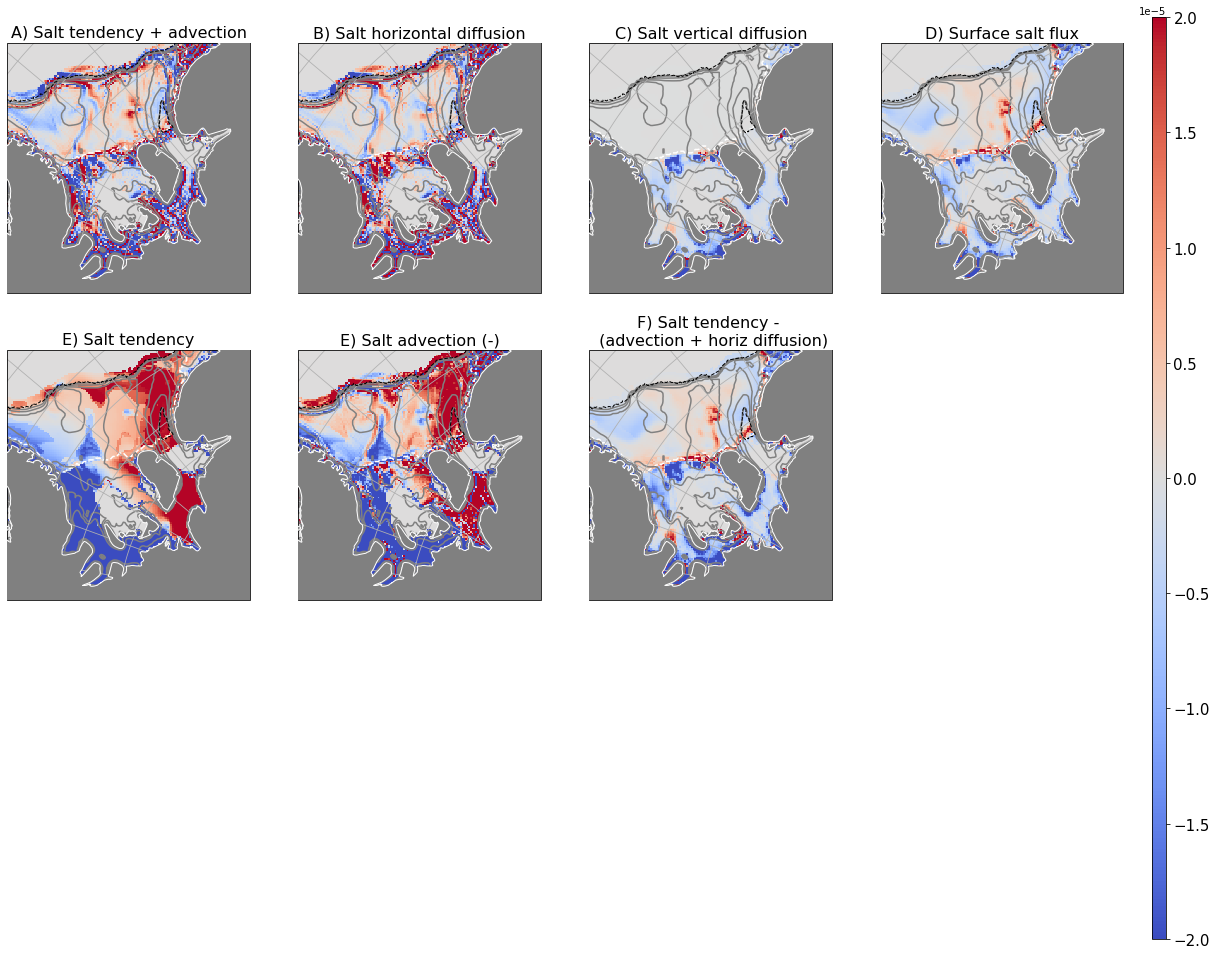

In [30]:
# for 2000m isoline
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
# limits for contour of ice front (Ronne-Filchner IS):
xlimit = np.arange(300,500,1)
ylimit = np.arange(100,300,1)

proj = ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(20,16))

ax1 = fig.add_subplot(3,4,1, projection=proj)
#plt.title('Salt tendency, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
plt.title('A) Salt tendency + advection', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_net_sum, axis=0)-np.nanmean(salt_adv_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax1.gridlines()
ax1.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax1.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,400,600,800,1000), transform=ccrs.PlateCarree(), colors='grey')
#ax1.set_ylabel('WAOM10',fontsize=16)
plt.ylabel('WAOM10',fontsize=16)
#plt.clim(-1.5e-6,1.5e-6)

ax2 = fig.add_subplot(3,4,2, projection=proj)
#plt.title('Salt advection, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
plt.title('B) Salt horizontal diffusion', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_hdiff_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax2.gridlines()
ax2.set_extent([-85, -30, -84, -74], ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax2.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,400,600,800,1000), transform=ccrs.PlateCarree(), colors='grey')
#plt.clim(-1.5e-6,1.5e-6)

ax3 = fig.add_subplot(3,4,3, projection=proj)
#plt.title('Salt diffusion, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
plt.title('C) Salt vertical diffusion', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_vdiff_sum, axis=0)-np.nanmean(salt_sfc_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax3.gridlines()
ax3.set_extent([-85, -30, -84, -74], ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax3.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,400,600,800,1000), transform=ccrs.PlateCarree(), colors='grey')
#plt.clim(-1.5e-6,1.5e-6)

ax4 = fig.add_subplot(3,4,4, projection=proj)
#plt.title('Salt sfc flux, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
plt.title('D) Surface salt flux', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_sfc_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax4.gridlines()
ax4.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax4.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,400,600,800,1000), transform=ccrs.PlateCarree(), colors='grey')
#plt.clim(-1.5e-6,1.5e-6)
# set colorbar
cbar_ax1 = fig.add_axes([0.92, 0.1, 0.01, 0.8])
fig.colorbar(cy, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_xlabel('Transformation rates (Sv)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

ax5 = fig.add_subplot(3,4,5, projection=proj)
#plt.title('Salt tendency, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
plt.title('E) Salt tendency', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_net_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax5.gridlines()
ax5.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax5.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,400,600,800,1000), transform=ccrs.PlateCarree(), colors='grey')
#ax1.set_ylabel('WAOM10',fontsize=16)
plt.ylabel('WAOM10',fontsize=16)
#plt.clim(-1.5e-6,1.5e-6)

ax6 = fig.add_subplot(3,4,6, projection=proj)
#plt.title('Salt tendency, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
plt.title('E) Salt advection (-)', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_adv_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax6.gridlines()
ax6.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax6.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,400,600,800,1000), transform=ccrs.PlateCarree(), colors='grey')
#ax1.set_ylabel('WAOM10',fontsize=16)
plt.ylabel('WAOM10',fontsize=16)
#plt.clim(-1.5e-6,1.5e-6)

ax7 = fig.add_subplot(3,4,7, projection=proj)
#plt.title('Salt tendency, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
plt.title('F) Salt tendency - \n (advection + horiz diffusion)', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_net_sum, axis=0)-np.nanmean(salt_adv_sum, axis=0)-np.nanmean(salt_hdiff_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax7.gridlines()
ax7.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax7.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax7.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,400,600,800,1000), transform=ccrs.PlateCarree(), colors='grey')
#ax1.set_ylabel('WAOM10',fontsize=16)
plt.ylabel('WAOM10',fontsize=16)
#plt.clim(-1.5e-6,1.5e-6)

plt.show() 

# name_fig="waom10extend_shflim_S_0.25Q_WMTmaps_Full_salt_budget+_annual_yr20_shelf_RFIS_27.3-27.75kgm-3.png"
# plt.savefig(fig_path + name_fig, dpi=300)
#plt.close()

In [ ]:
# for 2000m isoline
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
# limits for contour of ice front (East Antarctica):
xlimit = np.arange(50,500,1)
ylimit = np.arange(400,600,1)

# East Antarctica

fig = plt.figure(figsize=(20,16))

ax1 = fig.add_subplot(3,4,1, projection=proj)
#plt.title('Salt tendency, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
plt.title('A) Salt tendency + advection', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_net_sum, axis=0)-np.nanmean(salt_adv_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax1.gridlines()
ax1.set_extent([60, 160, -70, -62], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax1.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
# plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,1000), transform=ccrs.PlateCarree(), colors='grey')
#ax1.set_ylabel('WAOM10',fontsize=16)
plt.ylabel('WAOM10',fontsize=16)
#plt.clim(-1.5e-6,1.5e-6)

ax2 = fig.add_subplot(3,4,2, projection=proj)
#plt.title('Salt advection, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
plt.title('B) Salt horizontal diffusion', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_hdiff_sum, axis=0)-np.nanmean(salt_sfc_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax2.gridlines()
ax2.set_extent([60, 160, -70, -62], ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax2.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
# plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,1000), transform=ccrs.PlateCarree(), colors='grey')
#plt.clim(-1.5e-6,1.5e-6)

ax3 = fig.add_subplot(3,4,3, projection=proj)
#plt.title('Salt diffusion, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
plt.title('C) Salt vertical diffusion', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_vdiff_sum, axis=0)-np.nanmean(salt_sfc_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax3.gridlines()
ax3.set_extent([60, 160, -70, -62], ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax3.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
# plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,1000), transform=ccrs.PlateCarree(), colors='grey')
#plt.clim(-1.5e-6,1.5e-6)

ax4 = fig.add_subplot(3,4,4, projection=proj)
#plt.title('Salt sfc flux, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
plt.title('D) Surface salt flux', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_sfc_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax4.gridlines()
ax4.set_extent([60, 160, -70, -62], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax4.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
# plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,1000), transform=ccrs.PlateCarree(), colors='grey')
#plt.clim(-1.5e-6,1.5e-6)
# set colorbar
cbar_ax1 = fig.add_axes([0.92, 0.1, 0.01, 0.8])
fig.colorbar(cy, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_xlabel('Transformation rates (Sv)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

ax5 = fig.add_subplot(3,4,5, projection=proj)
#plt.title('Salt tendency, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
plt.title('E) Salt tendency', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_net_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax5.gridlines()
ax5.set_extent([60, 160, -70, -62], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax5.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
# plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,1000), transform=ccrs.PlateCarree(), colors='grey')
#ax1.set_ylabel('WAOM10',fontsize=16)
plt.ylabel('WAOM10',fontsize=16)
#plt.clim(-1.5e-6,1.5e-6)

ax6 = fig.add_subplot(3,4,6, projection=proj)
#plt.title('Salt tendency, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
plt.title('E) Salt advection (-)', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_adv_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax6.gridlines()
ax6.set_extent([60, 160, -70, -62], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax6.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
# plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,1000), transform=ccrs.PlateCarree(), colors='grey')
#ax1.set_ylabel('WAOM10',fontsize=16)
plt.ylabel('WAOM10',fontsize=16)
#plt.clim(-1.5e-6,1.5e-6)

ax7 = fig.add_subplot(3,4,7, projection=proj)
#plt.title('Salt tendency, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
plt.title('F) Salt tendency - \n (advection + horiz diffusion)', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_net_sum, axis=0)-np.nanmean(salt_adv_sum, axis=0)-np.nanmean(salt_hdiff_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax7.gridlines()
ax7.set_extent([60, 160, -70, -62], crs=ccrs.PlateCarree())
ax7.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax7.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
# plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,1000), transform=ccrs.PlateCarree(), colors='grey')
#ax1.set_ylabel('WAOM10',fontsize=16)
plt.ylabel('WAOM10',fontsize=16)
#plt.clim(-1.5e-6,1.5e-6)

plt.show() 

name_fig="waom10extend_shflim_S_0.25Q_WMTmaps_Full_salt_budget+_annual_yr20_shelf_EAnt_27.4-27.45kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
# plt.close()

In [ ]:
fig = plt.figure(figsize=(10,10))
# ax1 = fig.add_subplot(111, projection=proj)
# plt.pcolormesh(lon_rho, lat_rho,ice_draft, transform=ccrs.PlateCarree())
plt.pcolormesh(ice_draft)
plt.show

In [ ]:
# for 2000m isoline
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
# limits for contour of ice front (West Antarct. IS):
xlimit = np.arange(100,500,1)
ylimit = np.arange(50,250,1)

# West Antarctica

fig = plt.figure(figsize=(20,16))

ax1 = fig.add_subplot(3,4,1, projection=proj)
#plt.title('Salt tendency, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
plt.title('A) Salt tendency + advection', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_net_sum, axis=0)-np.nanmean(salt_adv_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax1.gridlines()
ax1.set_extent([-150, -55, -76, -70], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax1.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(2000, 2001), transform=ccrs.PlateCarree(), colors='grey')
#ax1.set_ylabel('WAOM10',fontsize=16)
plt.ylabel('WAOM10',fontsize=16)
#plt.clim(-1.5e-6,1.5e-6)

ax2 = fig.add_subplot(3,4,2, projection=proj)
#plt.title('Salt advection, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
plt.title('B) Salt horizontal diffusion', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_hdiff_sum, axis=0)-np.nanmean(salt_sfc_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax2.gridlines()
ax2.set_extent([-150, -55, -76, -70], ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax2.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(2000, 2001), transform=ccrs.PlateCarree(), colors='grey')
#plt.clim(-1.5e-6,1.5e-6)

ax3 = fig.add_subplot(3,4,3, projection=proj)
#plt.title('Salt diffusion, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
plt.title('C) Salt vertical diffusion', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_vdiff_sum, axis=0)-np.nanmean(salt_sfc_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax3.gridlines()
ax3.set_extent([-150, -55, -76, -70], ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax3.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(2000, 2001), transform=ccrs.PlateCarree(), colors='grey')
#plt.clim(-1.5e-6,1.5e-6)

ax4 = fig.add_subplot(3,4,4, projection=proj)
#plt.title('Salt sfc flux, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
plt.title('D) Surface salt flux', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_sfc_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax4.gridlines()
ax4.set_extent([-150, -55, -76, -70], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax4.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(2000, 2001), transform=ccrs.PlateCarree(), colors='grey')
#plt.clim(-1.5e-6,1.5e-6)
# set colorbar
cbar_ax1 = fig.add_axes([0.92, 0.1, 0.01, 0.8])
fig.colorbar(cy, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_xlabel('Transformation rates (Sv)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

ax5 = fig.add_subplot(3,4,5, projection=proj)
#plt.title('Salt tendency, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
plt.title('E) Salt tendency', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_net_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax5.gridlines()
ax5.set_extent([-150, -55, -76, -70], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax5.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(2000, 2001), transform=ccrs.PlateCarree(), colors='grey')
#ax1.set_ylabel('WAOM10',fontsize=16)
plt.ylabel('WAOM10',fontsize=16)
#plt.clim(-1.5e-6,1.5e-6)

ax6 = fig.add_subplot(3,4,6, projection=proj)
#plt.title('Salt tendency, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
plt.title('E) Salt advection (-)', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_adv_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax6.gridlines()
ax6.set_extent([-150, -55, -76, -70], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax6.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(2000, 2001), transform=ccrs.PlateCarree(), colors='grey')
#ax1.set_ylabel('WAOM10',fontsize=16)
plt.ylabel('WAOM10',fontsize=16)
#plt.clim(-1.5e-6,1.5e-6)

ax7 = fig.add_subplot(3,4,7, projection=proj)
#plt.title('Salt tendency, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
plt.title('F) Salt tendency - \n (advection + horiz diffusion)', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_net_sum, axis=0)-np.nanmean(salt_adv_sum, axis=0)-np.nanmean(salt_hdiff_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax7.gridlines()
ax7.set_extent([-150, -55, -76, -70], crs=ccrs.PlateCarree())
ax7.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
# ax7.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(2000, 2001), transform=ccrs.PlateCarree(), colors='grey')
#ax1.set_ylabel('WAOM10',fontsize=16)
plt.ylabel('WAOM10',fontsize=16)
#plt.clim(-1.5e-6,1.5e-6)

plt.show() 

name_fig="waom10extend_shflim_S_0.25Q_WMTmaps_Full_salt_budget+_annual_yr20_shelf_WAnt_27.4-27.45kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
#plt.close()

In [ ]:
## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

# limits for contour of ice front (Ronne-Filchner IS):
xlimit = np.arange(300,500,1)
ylimit = np.arange(100,300,1)

fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(3,3,1, projection=proj)
plt.title('A) Salt tendency - \n (advection + horiz. diffusion)', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_net_sum, axis=0)-np.nanmean(salt_adv_sum, axis=0)-np.nanmean(salt_hdiff_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax1.gridlines(zorder=4)
ax1.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(3,3,2, projection=proj)
plt.title('B) Salt vertical diffusion', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_vdiff_sum, axis=0)-np.nanmean(salt_sfc_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax2.gridlines(zorder=4)
ax2.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax3 = fig.add_subplot(3,3,3, projection=proj)
plt.title('C) Surface salt flux', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_sfc_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax3.gridlines(zorder=4)
ax3.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

# set colorbar
cbar_ax1 = fig.add_axes([0.92, 0.1, 0.01, 0.8])
fig.colorbar(cy, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates (Sv)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

plt.show()
name_fig="waom10extend_shflim_S_0.25Q_WMTmaps_Full_salt_budget_annual_yr20_shelf_RFIS_27.3-27.75kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)


In [ ]:
## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

# limits for contour of ice front (East Antarctica):
xlimit = np.arange(50,500,1)
ylimit = np.arange(400,600,1)

fig = plt.figure(figsize=(10,16))

ax1 = fig.add_subplot(3,3,1, projection=proj)
plt.title('A) Salt tendency - \n (advection + horiz. diff.)', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_net_sum, axis=0)-np.nanmean(salt_adv_sum, axis=0)-np.nanmean(salt_hdiff_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax1.gridlines(zorder=4)
ax1.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax2 = fig.add_subplot(3,3,2, projection=proj)
plt.title('B) Salt vertical diff.', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_vdiff_sum, axis=0)-np.nanmean(salt_sfc_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax2.gridlines(zorder=4)
ax2.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)


ax3 = fig.add_subplot(3,3,3, projection=proj)
plt.title('C) Surface salt flux', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_sfc_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax3.gridlines(zorder=4)
ax3.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)


# set colorbar
cbar_ax1 = fig.add_axes([0.92, 0.1, 0.01, 0.8])
fig.colorbar(cy, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates (Sv)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

plt.show()
name_fig="waom10extend_shflim_S_0.25Q_WMTmaps_Full_salt_budget_annual_yr20_shelf_EAnt_27.3-27.75kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)


In [ ]:
## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]
# limits for contour of ice front (West Antarct. IS):
xlimit = np.arange(100,560,1)
ylimit = np.arange(50,250,1)

fig = plt.figure(figsize=(10,16))

ax1 = fig.add_subplot(3,3,1, projection=proj)
plt.title('A) Salt tendency - \n (advection + horiz. diffusion)', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_net_sum, axis=0)-np.nanmean(salt_adv_sum, axis=0)-np.nanmean(salt_hdiff_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax1.gridlines(zorder=4)
ax1.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax2 = fig.add_subplot(3,3,2, projection=proj)
plt.title('B) Salt vertical diffusion', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_vdiff_sum, axis=0)-np.nanmean(salt_sfc_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax2.gridlines(zorder=4)
ax2.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax3 = fig.add_subplot(3,3,3, projection=proj)
plt.title('C) Surface salt flux', fontsize=16)
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(salt_sfc_sum, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-2e-5, vmax=2e-5)
ax3.gridlines(zorder=4)
ax3.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax1 = fig.add_axes([0.92, 0.1, 0.01, 0.8])
fig.colorbar(cy, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_xlabel('Transformation rates (Sv)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

plt.show()
name_fig="waom10extend_shflim_S_0.25Q_WMTmaps_Full_salt_budget_annual_yr20_shelf_WAnt_27.3-27.75kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)


In [ ]:
# monthly plots:
for mm in np.arange(0,12):
    salt_net_sum_mm = salt_net_sum[mm,:,:]
    salt_adv_sum_mm = salt_adv_sum[mm,:,:]
    salt_diff_sum_mm = salt_diff_sum[mm,:,:]
    salt_sfc_sum_mm = salt_sfc_sum[mm,:,:]

    proj = ccrs.SouthPolarStereo()
    fig = plt.figure(figsize=(10,10))

    ax1 = fig.add_subplot(221, projection=proj)
    plt.title('Salt tendency + advection, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
    cy=plt.pcolormesh(lon_rho,lat_rho,salt_net_sum_mm - salt_adv_sum_mm, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-3e-5, vmax=3e-5)
    ax1.gridlines()
    ax1.set_extent([-85, -30, -84, -74], ccrs.PlateCarree())
    ax1.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
    ax1.add_feature(bathym, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
    plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
    plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,400,600,800,1000), transform=ccrs.PlateCarree(), colors='grey')

#    ax2 = fig.add_subplot(222, projection=proj)
#    plt.title('Salt advection, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
#    cy=plt.pcolormesh(lon_rho,lat_rho,salt_adv_sum_mm, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-3e-5, vmax=3e-5)
#    ax2.gridlines()
#    ax2.set_extent([-85, -30, -84, -74], ccrs.PlateCarree())
#    ax2.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
#    ax2.add_feature(bathym, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
#    plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
#    plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,400,600,800,1000), transform=ccrs.PlateCarree(), colors='grey')

    ax3 = fig.add_subplot(223, projection=proj)
    plt.title('Salt diffusion, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
    cy=plt.pcolormesh(lon_rho,lat_rho,salt_diff_sum_mm-salt_sfc_sum_mm, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-3e-5, vmax=3e-5)
    ax3.gridlines()
    ax3.set_extent([-85, -30, -84, -74], ccrs.PlateCarree())
    ax3.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
    ax3.add_feature(bathym, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
    plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
    plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,400,600,800,1000), transform=ccrs.PlateCarree(), colors='grey')

    ax4 = fig.add_subplot(224, projection=proj)
    plt.title('Salt sfc flux, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
    cy=plt.pcolormesh(lon_rho,lat_rho,salt_sfc_sum_mm, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-3e-5, vmax=3e-5)
    ax4.gridlines()
    ax4.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
    ax4.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
    ax4.add_feature(bathym, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
    plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
    plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,400,600,800,1000), transform=ccrs.PlateCarree(), colors='grey')

    cbar_ax1 = fig.add_axes([0.92, 0.1, 0.01, 0.8])
    fig.colorbar(cy, cax=cbar_ax1, orientation='vertical')
    cbar_ax1.set_xlabel('Transformation rates (Sv)')

#     name_fig="waom10extend_shflim_S_0.25Q_WMTmaps_Full_salt_budget_annual_yr20_shelf_mm=" + str(mm) + "_RFIS_27.4-27.45kgm-3.png"
    plt.savefig(fig_path + name_fig, dpi=300)
    plt.close()

In [ ]:
# print(salt_sfc_sum.shape)
# print(dg)

# salt_net_mov = xr.DataArray(salt_net_sum, name='salt_net', coords= {'time':np.arange(0,12),'eta_rho':dg.eta_rho,'xi_rho':dg.xi_rho})
# salt_adv_mov = xr.DataArray(salt_adv_sum, name='salt_adv', coords= {'time':np.arange(0,12),'eta_rho':dg.eta_rho,'xi_rho':dg.xi_rho})
# salt_diff_mov = xr.DataArray(salt_diff_sum, name='salt_diff', coords= {'time':np.arange(0,12),'eta_rho':dg.eta_rho,'xi_rho':dg.xi_rho})
# salt_sfc_mov = xr.DataArray(salt_sfc_sum, name='salt_sfc', coords= {'time':np.arange(0,12),'eta_rho':dg.eta_rho,'xi_rho':dg.xi_rho})

# salt = xr.Dataset(
#     {
#         'salt_net': (['time','eta_rho','xi_rho'], salt_net_sum),
#         'salt_adv': (['time','eta_rho','xi_rho'], salt_adv_sum),
#         'salt_diff': (['time','eta_rho','xi_rho'], salt_diff_sum),
#         'salt_sfc': (['time','eta_rho','xi_rho'], salt_sfc_sum),
#     },
#     coords= {'time':np.arange(0,12),'eta_rho':dg.eta_rho,'xi_rho':dg.xi_rho}
#     )


In [ ]:
# # for 2000m isoline
# bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
# # limits for contour of ice front (Ronne-Filchner IS):
# xlimit = np.arange(300,500,1)
# ylimit = np.arange(100,300,1)

# fig = plt.figure(figsize=(10,10))


# def custom_plotfunc(salt, fig, tt, *args, **kwargs):
    
#     ax1 = fig.add_subplot(221, projection=proj)
#     plt.title('Salt tendency, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)) + '\n month = ' + str(tt), fontsize=14)
#     cy=plt.pcolormesh(lon_rho,lat_rho,salt['salt_net'].isel(time=tt), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-3e-5, vmax=3e-5)
#     ax1.gridlines()
#     ax1.set_extent([-85, -30, -84, -74], ccrs.PlateCarree())
#     ax1.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
#     ax1.add_feature(bathym, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
#     plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
#     plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,400,600,800,1000), transform=ccrs.PlateCarree(), colors='grey')
    
#     ax2 = fig.add_subplot(222, projection=proj)
#     plt.title('Salt advection, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
#     cy=plt.pcolormesh(lon_rho,lat_rho,salt['salt_adv'].isel(time=tt), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-3e-5, vmax=3e-5)
#     ax2.gridlines()
#     ax2.set_extent([-85, -30, -84, -74], ccrs.PlateCarree())
#     ax2.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
#     ax2.add_feature(bathym, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
#     plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
#     plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,400,600,800,1000), transform=ccrs.PlateCarree(), colors='grey')

#     ax3 = fig.add_subplot(223, projection=proj)
#     plt.title('Salt diffusion, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
#     cy=plt.pcolormesh(lon_rho,lat_rho,salt['salt_diff'].isel(time=tt)-salt['salt_sfc'].isel(time=tt), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-3e-5, vmax=3e-5)
#     ax3.gridlines()
#     ax3.set_extent([-85, -30, -84, -74], ccrs.PlateCarree())
#     ax3.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
#     ax3.add_feature(bathym, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
#     plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
#     plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,400,600,800,1000), transform=ccrs.PlateCarree(), colors='grey')

#     ax4 = fig.add_subplot(224, projection=proj)
#     plt.title('Salt sfc flux, $\sigma_{\Theta}$ = ' + str(np.around(rho_grid[26],decimals=2)) + ':'  + str(np.around(rho_grid[36],decimals=2)), fontsize=14)
#     cy=plt.pcolormesh(lon_rho,lat_rho,salt['salt_sfc'].isel(time=tt), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-3e-5, vmax=3e-5)
#     ax4.gridlines()
#     ax4.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
#     ax4.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
#     ax4.add_feature(bathym, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
#     plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
#     plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h[xlimit,ylimit],levels=(200,400,600,800,1000), transform=ccrs.PlateCarree(), colors='grey')

#     fig.subplots_adjust(wspace=0.6)

#     return None, None
#     # ^ This is not strictly necessary, but otherwise a warning will be raised.


In [ ]:

# mov_custom = Movie(salt, custom_plotfunc, input_check=False)

# mov_custom.save('/users/boeiradi/COLD_project/postprocessing/figs/WMT/movie/WAOM10extend_WMTmap_salt_budget.mp4', overwrite_existing=True, progress=True, framerate=1)



